In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
from scipy.linalg import eig
from scipy.interpolate import interp1d
#from scipy.integrate import quad

In [2]:
def expectation(H_matrix, psi):
    avg = np.dot(psi, H_matrix)
    avg = np.dot(avg, psi)
    return np.real(avg)

In [8]:
#global nmax
nmax = 5  

def first_band(N, delta, eta, kapa, U0, q):

   # b = delta / kapa
   # c = N * U0 / kapa
   # d = eta / kapa

    Nph_max = (eta / kapa)**2
    Nph_trial = np.arange(0, Nph_max, 0.1)
    Nph_final = [] 
    for Nph in Nph_trial:

        diagonals = [(2*np.arange(-nmax,nmax+1,1)+q)**2+U0*Nph/2,U0*Nph/4*np.ones(2*nmax),U0*Nph/4*np.ones(2*nmax)]  # Here I need U0 so can't use U0/kapa
        H_matrix = diags(diagonals, [0, -1, 1]).toarray()
        eva,eve = eig(H_matrix)
        eve=np.transpose(eve)

        sort_index = np.argsort(eva)
        eva = eva[sort_index]
        eve = eve[sort_index]

        diagonals = ((1/2*np.ones(2*nmax+1), 1/4*np.ones(2*nmax), 1/4*np.ones(2*nmax)))
        cossqr_matrix = diags(diagonals, [0, -1, 1]).toarray()
        
        nph = eta**2/(kapa**2+(delta-N*U0*expectation(cossqr_matrix, eve[0]))**2) # parameters for nph converted as suggested
        
        Nph_final.append(nph)
    Nph_final = np.array(Nph_final)    
    Nph_index = np.where(np.diff(np.sign(Nph_final-Nph_trial)))[0]
    Nph_sol = Nph_trial[Nph_index]    

    # Lowest band energy
    E=[]
    for i in Nph_sol:
        Nph = i 
        diagonals = [(2*np.arange(-nmax, nmax+1, 1) + q)**2 + U0 * Nph/2, U0 * Nph/4 * np.ones(2*nmax), U0 * Nph/4 * np.ones(2*nmax)]
        H_matrix = diags(diagonals, [0, -1, 1]).toarray()
        #print(H)
        eva,eve = eig(H_matrix)
        eve=np.transpose(eve)

        sort_index = np.argsort(eva)
        eva = eva[sort_index]
        eve = eve[sort_index]

        #Avg cos square
        diagonals = ((1/2*np.ones(2*nmax+1), 1/4*np.ones(2*nmax), 1/4*np.ones(2*nmax)))        
        H_matrix = diags(diagonals, [0, -1, 1]).toarray()
        psi = eve[0]
        avg1 = expectation(H_matrix, psi)

        # Avg del square        
        diagonals = [(2*np.arange(-nmax,nmax+1,1)+q)**2]
        H_matrix = diags(diagonals, [0]).toarray()
        psi = eve[0]
        avg2 = expectation(H_matrix, psi)


        phi = np.arctan((delta - U0* N * avg1)/kapa)
        
        Iph = eta**2 / kapa
        factor = phi * Iph
        E.append(avg2-factor/N)
    E = np.array(E)   
    #print(Nph_sol, E)
    return Nph_sol, E



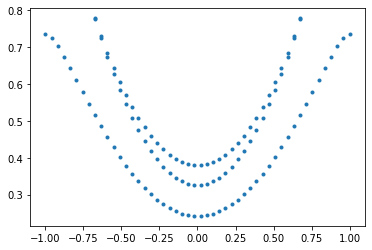

In [9]:
# E vs q

A1 = np.empty(0)
A2 = np.empty(0)
kapa=350
eta=909.9
U0=1
N=10**4
delta = 3140
for q in np.linspace(-1,1,50):

    E = first_band(N, delta, eta, kapa, U0, q)[1]
    A1 = np.concatenate((A1, E), axis=0)
    A2 = np.concatenate((A2, E*0 + q), axis=0)

plt.plot(A2,A1,'.')

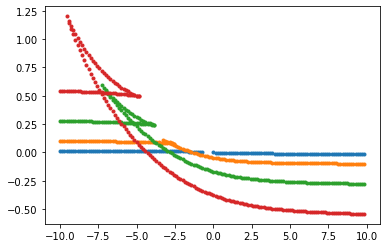

In [10]:
#Delta vs E

kapa=350
U0=1
N=10**4
q=0
eta_cr=325

factors=[.5,1.5,2.5,3.5]

for i in factors:
    A1 = np.empty(0)
    A2 = np.empty(0)
    eta = i * eta_cr
    
    for i in np.arange(1500,8500,50):
        delta= i
        E = first_band(N, delta, eta, kapa, U0, q)[1]
        A1 = np.concatenate((A1, E), axis=0)
        A2 = np.concatenate((A2, E*0 + (i-N*U0/2)/kapa), axis=0)
    plt.plot(A2,A1,'.')

  

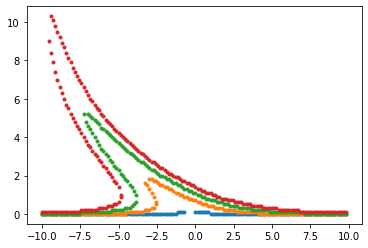

In [11]:
#Delta vs no. of photons
U0=1
N=10**4
q=0

eta_cr=325
factors=[.5,1.5,2.5,3.5]

for i in factors:
    
    A1 = np.empty(0)
    A2 = np.empty(0)
    kapa=350
    
    eta = i * eta_cr

    for i in np.arange(1500,8500,50):
        delta= i
        Nph_sol = first_band(N, delta, eta, kapa, U0, q)[0]
        A1 = np.concatenate((A1, Nph_sol), axis=0)
        A2 = np.concatenate((A2, Nph_sol*0 + (i-N*U0/2)/kapa), axis=0)
    plt.plot(A2,A1,'.')


    

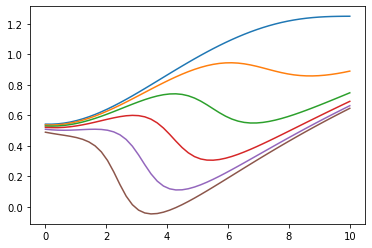

In [12]:
#no. of photons vs E
nph_arr= np.linspace(0,10,50)
U0=1
q=0
eta=3.5*eta_cr
deltas=[1600,2000,2400,2800,3200,3600]
for delta in deltas:
    E=[]
    for Nph in nph_arr:

        diagonals = [(2*np.arange(-nmax, nmax+1, 1) + q)**2 + U0 * Nph/2, U0 * Nph/4 * np.ones(2*nmax), U0 * Nph/4 * np.ones(2*nmax)]
        H_matrix = diags(diagonals, [0, -1, 1]).toarray()
        #print(H)
        eva,eve = eig(H_matrix)
        eve=np.transpose(eve)

        sort_index = np.argsort(eva)
        eva = eva[sort_index]
        eve = eve[sort_index]

        #Avg cos square
        diagonals = ((1/2*np.ones(2*nmax+1), 1/4*np.ones(2*nmax), 1/4*np.ones(2*nmax)))        
        H_matrix = diags(diagonals, [0, -1, 1]).toarray()
        psi = eve[0]
        avg1 = expectation(H_matrix, psi)

        # Avg del square        
        diagonals = [(2*np.arange(-nmax,nmax+1,1)+q)**2]
        H_matrix = diags(diagonals, [0]).toarray()
        psi = eve[0]
        avg2 = expectation(H_matrix, psi)


        phi = np.arctan((delta - N * U0  * avg1)/kapa)
        Iph = eta**2 / kapa
        factor = phi * Iph
        E.append(avg2-factor/N)
    plt.plot(nph_arr,E)

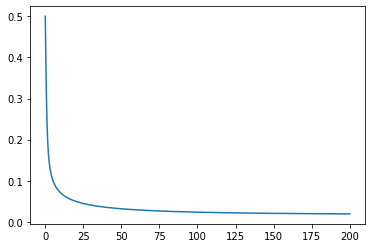

In [13]:
# Nph  vs  <cos**2(x)>

nph_arr= np.linspace(0,200,500)
U0=5
q=0
avg1=[]
for Nph in nph_arr:

    diagonals = [(2*np.arange(-nmax, nmax+1, 1) + q)**2 + U0 * Nph/2, U0 * Nph/4 * np.ones(2*nmax), U0 * Nph/4 * np.ones(2*nmax)]
    H_matrix = diags(diagonals, [0, -1, 1]).toarray()
    #print(H)
    eva,eve = eig(H_matrix)
    eve=np.transpose(eve)

    sort_index = np.argsort(eva)
    eva = eva[sort_index]
    eve = eve[sort_index]

    #Avg cos square
    diagonals = ((1/2*np.ones(2*nmax+1), 1/4*np.ones(2*nmax), 1/4*np.ones(2*nmax)))        
    H_matrix = diags(diagonals, [0, -1, 1]).toarray()
    psi = eve[0]
    avg1.append(expectation(H_matrix, psi))
plt.plot(nph_arr,avg1)

